# Combining off-limb and disk maps

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/masked_composite_plot.html

This example combines creating a composite plot with masking out the
solar disk. The purpose is to introduce users to the plotting process
required to overlay multiple maps that have been modified with other
``sunpy`` functions. The resulting plot in this tutorial shows information
on the upper photosphere, quiet corona, and magnetogram contours.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u

import sunpy.data.sample
from sunpy.map import Map
from sunpy.map.maputils import all_coordinates_from_map, coordinate_is_on_solar_disk

Let's import sample data representing the three types of data we want to
overlay: AIA 1600 (upper photosphere), AIA 171 (quiet corona), and HMI
data (magnetic fields in the photosphere).

In [ ]:
aia_1600 = Map(sunpy.data.sample.AIA_1600_IMAGE)
aia_171 = Map(sunpy.data.sample.AIA_171_IMAGE)
hmi = Map(sunpy.data.sample.HMI_LOS_IMAGE)

Next, let's mask out the solar disk of the AIA 171 image since we will be
overlaying the AIA 1600 photosphere.

In [ ]:
hpc_coords = all_coordinates_from_map(aia_171)
mask = coordinate_is_on_solar_disk(hpc_coords)
colormap = aia_171.cmap.copy()
colormap.set_bad('black')

scaled_map = Map(aia_171.data, aia_171.meta, mask=mask)

Before we plot the composite image, let's define the contour levels that will
be applied to the HMI image. Also, grab the AIA 171 colormap to use with
the AIA 1600 image to better match the images.

In [ ]:
levels = [-1000, -500, -250, 250, 500, 1000]*u.G
aia171_cmap = plt.get_cmap('sdoaia171')

Now, create the plot by overlaying the maps and contours. Note that
``clip_interval`` is being defined to highlight the coronal features of the
scaled AIA 171 map and the AIA 1600 map is autoaligned to the AIA 171 WCS
Axes.

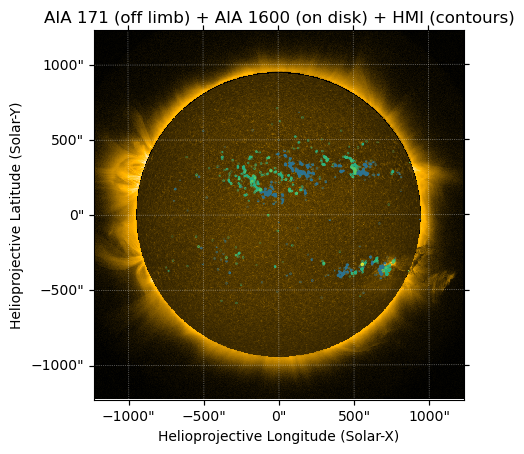

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=scaled_map)
scaled_map.plot(axes=ax, clip_interval=(1, 99.95)*u.percent,
                cmap=colormap, zorder=0)
aia_1600.plot(axes=ax, cmap=aia171_cmap, autoalign=True, zorder=1)
hmi.draw_contours(axes=ax, levels=levels, zorder=2)
ax.set_title("AIA 171 (off limb) + AIA 1600 (on disk) + HMI (contours)")

plt.show()